# Applied Machine Learning
### Workshop 3 of DASIL's series on "Data Science with Python"
### Created by Martin Pollack, Yusen He, and Declan O'Reilly

In this Jupyter notebook we will teach you how to fit the machine learning models we talked about last week in Python using the `scikit-learn` package.

All of our example datasets come from the `datasets` sub-package within `scikit-learn`. So we import them now.

In [1]:
from sklearn import datasets

## Supervised Learning - Regression

#### Dataset introduction

Remember that in a regression problem the outcome variable is numeric and continuous. However, the predictor variables can either be continuous or discrete.

An example of a regression problem can be found in the diabetes dataset within sklearn. Our outcome is a quantitative measure of disease progression that takes on numbers between 25 and 346.

In [2]:
diabetes = datasets.load_diabetes(as_frame=True)

`diabetes` is a special scikit-learn dataset. Its `target` field is a pandas Series with our continuous outcome variable.

In [3]:
diabetes.target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

And its `data` field is a pandas Dataframe of all of our potential predictor variables. 

The `diabetes` dataset contains the following variables:



*   **age:** age in years
*   **sex:** gender
*   **bmi:** body mass index
*   **bp:** average blood pressure
*   **s1 tc:** total serum cholesterol
*   **s2 ldl:** low-density lipoproteins
*   **s3 hdl:** high-density lipoproteins
*   **s4 tch:** total cholesterol / HDL
*   **s5 ltg:** possibly log of serum triglycerides level
*   **s6 glu:** blood sugar level

Here, all 10 variables inside `diabetes` dataset have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).


In [4]:
diabetes.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


To make things easier, we will just rename our `target` to `Y` and our predictors to `X`.

In [5]:
Y = diabetes.target
X = diabetes.data

#### Splitting the dataset into Training and Test data

To evaluate the performance of our models, we need to randomly split our features dataset `X` and outcomes `Y` into a training set `X_train`/`y_train` and testing set `X_test`/`Y_test`. Randomly, we will use some observations to train our models and others see how our model generalizes to new data.

The `sklearn.model_selection.train_test_split()` does the random split for the training and testing dataset.

The `test_size` option controls proportion of the observations in our original data that we want to include in our test dataset. The `random_state` parameter controls the random selection process.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [7]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(442, 10)
(331, 10)
(111, 10)
(442,)
(331,)
(111,)


#### Linear Regression

Let's fit our first machine learning model! We are going to first fit a linear regression, which is the simplest model we will consider since it has no hyperparameters.

At a minimum this process takes two steps.

First we create the model object, specifying any hyperparameters (but there are none for now). In this case we want to use the `LinearRegression` object from `sklearn.linear_model`.

In [8]:
from sklearn.linear_model import LinearRegression
regressor_LinReg = LinearRegression()

Second we have to actually fit the linear regression model using our training data. This is done by calling the `fit()` method on our model object.

In [9]:
regressor_LinReg.fit(X_train,Y_train)

LinearRegression()

We can now make predictions for our test dataset using our model!

In [10]:
LinReg_pred = regressor_LinReg.predict(X_test)
LinReg_pred

array([241.84730258, 250.12303941, 164.96456549, 119.11639346,
       188.23120303, 260.56079379, 113.07583812, 190.54117538,
       151.8883747 , 236.50848375, 168.76844138, 180.52719713,
       109.16037049,  90.20148392, 244.73990469,  90.58113696,
       152.51268196,  66.97735025,  98.0467335 , 215.39557064,
       197.70737206, 160.9176914 , 162.88584001, 158.25373793,
       202.44823294, 168.46663088, 119.87243699,  83.05669211,
       189.9839726 , 163.02279586, 177.07828326,  82.6702699 ,
       144.53204953, 146.07901596, 141.73841253, 195.18658206,
       164.18043648, 189.14768927, 128.13330927, 206.12996392,
        82.64273523, 164.94912645, 144.46057692, 182.0519825 ,
       178.41355601,  72.5504089 , 142.69750371, 140.43671531,
       121.75256103, 233.70553551, 162.07809758,  76.90270416,
       155.68916375, 156.64052259, 238.11357481, 175.75735587,
       190.82555855, 119.48230582, 131.3142863 , 172.2453037 ,
       214.44479397, 171.30900357, 156.69146772, 110.97

Also, we can use the `score()` method to get a quick idea of how our model did. For regression, the evaluation metric used is $R^2$.

In [11]:
LinReg_pred.score(X_train, Y_train)

AttributeError: ignored

#### Artificial Neural Network for regression

Now we are going to fit a much more complicated model to our data: an artificial neural network (ANN). ANNs can be very accurate; however, they have lots of hyperparameters that are hard to get right.

We start by seeing what possible hyperparameters an ANN has and what their default values are.

In [12]:
from sklearn.neural_network import MLPRegressor
MLPRegressor().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Now we can set up an ANN model, this time specifying specific values for hyperparameters like the number of hidden layers. All hyperparameters that we don't specify values for will have their default values.

In [13]:
regressor_ANN_default = MLPRegressor(hidden_layer_sizes=(40,1), solver='lbfgs', max_iter=2000, learning_rate_init=0.000001, random_state=1)

Next we fit this specific model with the `fit()` method and evaluate it with `score()` method.

In [14]:
regressor_ANN_default.fit(X_train, Y_train)
regressor_ANN_default.score(X_test, Y_test)

0.34888647829370967

So we just fit an ANN with one set of hyperparameters.

But our choice of hyperparameters is going to have a big effect on how well our model does. Thus, ideally we want to try multiple combinations of hyperparameters and then pick the best one.

The first method we use for "hyperparameter tuning" is the `GridSearchCV()` function. We give it specific values of hyperparameters we want to be considered. These hyperparameters are detailed using a dictionary of lists.

Then when we fit our `GridSearchCV` object, we will actually be fitting many ANNs at once, one for each combination of hyperparameters. As part of the fitting process, Python does cross validation (CV) on each model and picks the best combination based on the model with the best overall evaluation metric.

In [15]:
from sklearn.model_selection import GridSearchCV

ANN = MLPRegressor(solver='lbfgs', max_iter=5000)
parameters = {'learning_rate_init':[0.0001, 0.000001], 'hidden_layer_sizes':[(5,1), (35,1), (40,1), (200,1)]}
regressor_ANN_tuned_grid = GridSearchCV(ANN, parameters)
regressor_ANN_tuned_grid.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(estimator=MLPRegressor(max_iter=5000, solver='lbfgs'),
             param_grid={'hidden_layer_sizes': [(5, 1), (35, 1), (40, 1),
                                                (200, 1)],
                         'learning_rate_init': [0.0001, 1e-06]})

To see all the results, access the `cv_results_` field of our `GridSearchCV` object. And to see the best combination, access the `best_estimator_` field of the same object.

In [16]:
print(regressor_ANN_tuned_grid.best_estimator_)
print(regressor_ANN_tuned_grid.best_score_)

MLPRegressor(hidden_layer_sizes=(5, 1), learning_rate_init=0.0001,
             max_iter=5000, solver='lbfgs')
0.23194780499662615


Again we can what are model predicts using the `predict()` method on our model object. Although we trained multiple ANNs at once, it will by default give us predictions from the best model.

In [17]:
ANN_pred = regressor_ANN_tuned_grid.predict(X_test)
ANN_pred

array([151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92145015,
       151.92145015, 151.92145015, 151.92145015, 151.92

#### Performance Assessment using Testing Data

We will compare the two models using these four metrics:
*   Mean Absolute Error
*   Mean Absolute Percentage Error
*   Mean Square Error
*   Root-Mean-Square Error

First, let's compute Mean Absolute Error (MAE) for predictions

In [18]:
from sklearn.metrics import mean_absolute_error
MAE_GLM = mean_absolute_error(Y_test, LinReg_pred)
MAE_ANN = mean_absolute_error(Y_test, ANN_pred)

print("The MAE of predictions provided by GLM is :")
print(MAE_GLM)

print("The MAE of predictions provided by ANN is :")
print(MAE_ANN)


The MAE of predictions provided by GLM is :
45.120987683251
The MAE of predictions provided by ANN is :
58.31036172123786


Second, let's compute Mean Absolute Percentage Error (MAPE) for predictions

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE_GLM = mean_absolute_percentage_error(Y_test, LinReg_pred)
MAPE_ANN = mean_absolute_percentage_error(Y_test, ANN_pred)

print("The MAPE of predictions provided by GLM is :")
print(MAPE_GLM)

print("The MAPE of predictions provided by ANN is :")
print(MAPE_ANN)

The MAPE of predictions provided by GLM is :
0.37961401187552524
The MAPE of predictions provided by ANN is :
0.5261272203265065


Third, let's compute Mean Square Error (MSE) for predictions

In [20]:
from sklearn.metrics import mean_squared_error
MSE_GLM = mean_squared_error(Y_test, LinReg_pred)
MSE_ANN = mean_squared_error(Y_test, ANN_pred)

print("The MSE of predictions provided by GLM is :")
print(MSE_GLM)

print("The MSE of predictions provided by ANN is :")
print(MSE_ANN)

The MSE of predictions provided by GLM is :
3180.1988368427265
The MSE of predictions provided by ANN is :
4965.1264716492215


Last, let's compute Root-Mean-Suqare-Error (RMSE) for predictions

In [21]:
from sklearn.metrics import mean_squared_error
RMSE_GLM = mean_squared_error(Y_test, LinReg_pred, squared=False)
RMSE_ANN = mean_squared_error(Y_test, ANN_pred, squared=False)

print("The RMSE of predictions provided by GLM is :")
print(RMSE_GLM)

print("The RMSE of predictions provided by ANN is :")
print(RMSE_ANN)

The RMSE of predictions provided by GLM is :
56.39325169594964
The RMSE of predictions provided by ANN is :
70.46365355024689


## Supervised Learning - Classification

#### Dataset Introduction

Now let's look at a classification problem, where the outcome can only take on 2 or more discrete values. But of course our predictors can be either continuous or discrete.

Now we use `scikit-learn`'s breast cancer dataset. Here the outcome can take on a 0, for no breast cancer, or 1, for breast cancer. 

So in this case we actually have a *binary classification* problem, meaning our category can only take on 2 discrete values. In most binary classification problems, like in this case, the categories are 0 and 1 indiciating the presence or absence of some trait.

In [22]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer(as_frame=True)

In [23]:
breast_cancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

The `breast cancer` dataset contains 30 predictive variables. For example:



*    radius (mean of distances from center to points on the perimeter)

*    texture (standard deviation of gray-scale values)

*    perimeter

*    area

*    smoothness (local variation in radius lengths)

*    compactness (perimeter^2 / area - 1.0)

*    concavity (severity of concave portions of the contour)

*    concave points (number of concave portions of the contour)

*    symmetry

*    fractal dimension (“coastline approximation” - 1)



The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.



In [24]:
breast_cancer.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Define the predictor variable set and a target


For the regression tasks, a feature set `X` and a target set `y` need to be defined first

In [25]:
X = breast_cancer.data
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
Y = breast_cancer.target
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

#### Split the dataset into training and test set

The `sklearn.model_selection.train_test_split` does the random split for the training and testing dataset.

Note: Here, `stratify` means the test set has equal numbers of 0 & 1.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, stratify=Y,  random_state=0)

To evaluate the model performance, we need to randomly split the feature set `X` and the target set `y` into the training set `X_train` & `y_train` and test set `X_test` & `y_test`.

The `test_size` option controls the size of the test set. The `random_state` parameter controls the shuffling applied which can be ignored in this work.

#### XGBoost for Binary Classification

The first classification model we will try is XGBoost, considered one of the best models out there.

Again we start by seeing what hyperparameters we can possibly tune.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Now let's create a model with specific hyperparameters. We will name it as `classifier_XGB`.

In this case, the score we get is the overall accuracy of our model.

In [29]:
classifier_XGB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0)
classifier_XGB.fit(X_train, Y_train)
classifier_XGB.score(X_train, Y_train)

0.9949748743718593

But again we probably want to do some hyperparameter tuning.

The second main way to do this is `RandomizedSearchCV()`. Here we give distributions for our hyperparameters instead of specific values. Python will then randomly choose hyperparameters to try based on the given distributions.

For example, for XGBoost we will use a normal distribution with mean of 0.5 and standard deviation of 0.1 for the "minimum impurity decrease". This means we will mostly try values close to 0.5, but occasionally some further from 0.5. We will then consider a uniform distribution for learning rate between 0 and 1, meaning any number in this range is equally likely to be chosen. 

In [30]:
XGB = GradientBoostingClassifier(n_estimators=100)

from scipy.stats import norm, uniform
distributions = {"min_impurity_decrease":norm(loc=0.5, scale=0.1), "learning_rate":uniform(loc=0.5, scale=0.5)}

from sklearn.model_selection import RandomizedSearchCV
classifier_XGB_tuned_random = RandomizedSearchCV(XGB, distributions, n_iter=10)

Now we fit our `RandomizedSearchCV` object. Since `n_iter` is 10 above, we will grab 10 combinations of hyperparameters from our two distributions. Then we will fit an XGBoost model for each combination, Python choosing the best one for us.

In [31]:
classifier_XGB_tuned_random.fit(X_train, Y_train)
XGB_pred = classifier_XGB_tuned_random.predict(X_test)

print(classifier_XGB_tuned_random.best_params_)
print(classifier_XGB_tuned_random.best_score_)

{'learning_rate': 0.8440089431838143, 'min_impurity_decrease': 0.4778342204983586}
0.9422784810126581


#### Support Vector Machine for Binary Classification

Lastly, we will create an SVM model. 

We will just go back to using `GridSearchCV()` for our hyperparameter tuning. To know what to tune, let's see what the hyperparameters are.

In [39]:
from sklearn.svm import SVC
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

We will now create and fit our model, leaving `gamma` fixed at `auto` and tuning `C`, which is by far the most important hyperparameter to get right.

In [40]:
SVC_model = SVC(gamma='auto', probability=True)

parameters = {"C":[0.001, 0.1, 0.5, 1, 1.5]}

classifier_SVM_tuned_grid = GridSearchCV(SVC_model, parameters)

classifier_SVM_tuned_grid.fit(X_train, Y_train)
print(classifier_SVM_tuned_grid.best_params_)
print(classifier_SVM_tuned_grid.best_score_)

SVM_pred = classifier_SVM_tuned_grid.predict(X_test)

{'C': 0.001}
0.6281645569620252


#### Performance Assessment

*   Confusion Matrix
*   Accuracy
*   Sensitivity
*   Specificity
*   AUC

We start by assessing XGBoost:

Confusion Matrix for XGB: 
 [[ 58   6]
 [  7 100]]


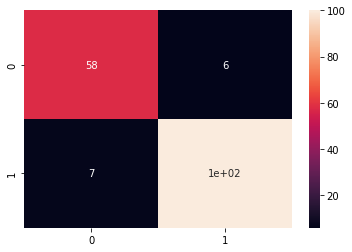

In [41]:
from sklearn.metrics import confusion_matrix
#Compute the confusion matrix
cmXGB = confusion_matrix(Y_test,XGB_pred)
print('Confusion Matrix for XGB: \n', cmXGB)

#Plot the confusion matrix using seaborn
import seaborn as sns
sns.heatmap(cmXGB, annot=True)

In [42]:
#Compute total test cases
totalXGB=sum(sum(cmXGB))
#####from confusion matrix calculate accuracy
accuracyXGB=(cmXGB[0,0]+cmXGB[1,1])/totalXGB
print ('Accuracy for XGB: ', accuracyXGB)

sensitivityXGB = cmXGB[1,1]/(cmXGB[1,0]+cmXGB[1,1])
print('Specificity for XGB: ', sensitivityXGB)

specificityXGB = cmXGB[0,0]/(cmXGB[0,0]+cmXGB[0,1])
print('Sensitivity for XGB: ', specificityXGB)

Accuracy for XGB:  0.9239766081871345
Specificity for XGB:  0.9345794392523364
Sensitivity for XGB:  0.90625


Then, we compute the AUC. We use the `roc_auc_score` from `sklearn`

In [43]:
from sklearn.metrics import roc_auc_score

#We first compute the probability output from the SVM classifier
XGB_prob = classifier_XGB_tuned_random.predict_proba(X_test)

#We compute the AUC score
aucSVM = roc_auc_score(Y_test,XGB_prob[:,1])
print('AUC for XGB: ', aucSVM)

AUC for XGB:  0.9616676401869159


Now for SVM's prediction, we have:

Confusion Matrix for SVM: 
 [[  0  64]
 [  0 107]]


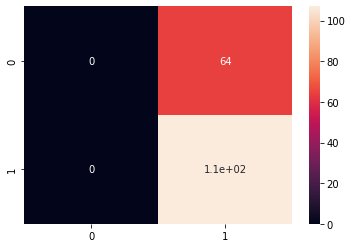

In [48]:
from sklearn.metrics import confusion_matrix
#Compute the confusion matrix
cmSVM = confusion_matrix(Y_test,SVM_pred)
print('Confusion Matrix for SVM: \n', cmSVM)

#Plot the confusion matrix using seaborn
import seaborn as sns
sns.heatmap(cmSVM, annot=True)

In [49]:
#Compute total test cases
totalSVM=sum(sum(cmSVM))
#####from confusion matrix calculate accuracy
accuracySVM=(cmSVM[0,0]+cmSVM[1,1])/totalSVM
print ('Accuracy for SVM: ', accuracySVM)

sensitivitySVM = cmSVM[1,1]/(cmSVM[1,0]+cmSVM[1,1])
print('Specificity for SVM: ', sensitivitySVM)

specificitySVM = cmSVM[0,0]/(cmSVM[0,0]+cmSVM[0,1])
print('Sensitivity for SVM: ', specificitySVM)

Accuracy for SVM:  0.6257309941520468
Specificity for SVM:  1.0
Sensitivity for SVM:  0.0


Then, we compute the AUC for SVM.

In [50]:
from sklearn.metrics import roc_auc_score

#We first compute the probability output from the SVM classifier
SVM_prob = classifier_SVM_tuned_grid.predict_proba(X_test)

#We compute the AUC score
aucSVM = roc_auc_score(Y_test,SVM_prob[:,1])
print('AUC for SVM: ', aucSVM)

AUC for SVM:  0.8879964953271028


## Unsupervised Learning - Clustering (and Dimension Reduction)

#### Dataset Introduction

Lastly we want to consider an unsupervised learning problem, where we don't actually have an outcome at all, or our data is "unlabeled." Instead of predicting something we just want to find patterns and structure in our data.

Our data can be unlabeled for two reasons:

• First, maybe our data does not have well-defined groupings. An example might be a company's customers: there are not clear and distinct groups that we can put people in. 

• Second, maybe the label of our data is missing. Suppose you are a wine vendor and you ordered three types of wine from your supplier. When you receive your wine shipment, however, you realize that the labels were not put on. You may want to learn about how the different wine bottles are related to one another to make an educated guess on which is what wine type.

Our example below falls in this second case.

In [ ]:
wine = datasets.load_wine(as_frame=True)

In [ ]:
wine.data.columns

In [ ]:
wine.data

#### Initialize the dataset

Initialize the dataset as `X`

In [ ]:
X= wine.data

In [ ]:
wine.target.value_counts()

#### Clustering using K-Means algorithm

##### Intialize the K-Means Algorithm

The K-Mean algorithm is included in the Scikit-leanr library. Define the number of clusters by `n_clusters` and random initialization state.

In [ ]:
from sklearn.cluster import KMeans
#Here we set n=3 in this workshop
cluster_KMeans = KMeans(n_clusters=3, random_state=0)
cluster_KMeans

##### Fit and predict using K-Mean algorithm



Fit the dataset

In [ ]:
cluster_KMeans.fit(X)

Prediction

In [ ]:
cluster_labels = cluster_KMeans.predict(X)
cluster_labels

Compute inner cluster distances (Euclidean distances) within all clusters

In [ ]:
cluster_KMeans.inertia_

##### Find the BEST k

Now, let's try different numbers of k to see how cluster centers change

In [ ]:
#Store the sum of inner cluster distances in a list and name is as dist
dist=[]

for i in range(2,11):
  #Run k-mean clustering with i centers
  cluster_KMeans = KMeans(n_clusters =i, random_state=0)
  cluster_KMeans.fit(X)
  #Store the summed inner cluster distances into the list namely 'dist'
  dist.append(cluster_KMeans.inertia_)

Display the inner cluster distances for all k

In [ ]:
dist

Now, let's use `matplotlib` library to visualize the inner cluster distances

In [ ]:
import matplotlib.pyplot as plt

We can plot the inner cluster distance curve and use Elbow's method to seek for optimal k

In [ ]:
import pandas as pd
import numpy as np

elbowPlot = pd.DataFrame(dist)
elbowPlot.rename(columns={0: "Inner cluster distance"}, inplace=True)
elbowPlot["Number of Clusters"] = np.arange(2, 11)

plt.plot(elbowPlot["Number of Clusters"], elbowPlot["Inner cluster distance"])
plt.show()

#### DBSCAN

The DBSCAN algorithm is included in the cluster subdirectory of scikit-learn.

To create the model, we need to decide our radius factor, `eps`, which tells us how large we think our clusters will be, and the minimum number of samples we want included in each cluster.

In [ ]:
from sklearn.cluster import DBSCAN

cluster_DBSCAN = DBSCAN(eps=40, min_samples=20)
cluster_DBSCAN

Fit the DBSCAN algorithm to our data.

In [ ]:
cluster_DBSCAN.fit(X)

Predict the clustering groups using our model.

In [ ]:
DBSCAN_predict = cluster_DBSCAN.fit_predict(X)

Unlike k-means, DBSCAN tries to figure out the optimal number of clusters.

How many clusters do we have in this fitted model? And what are they?

In [ ]:
print(len(set(DBSCAN_predict)))
print(np.unique(DBSCAN_predict, return_counts=True))

So here we have two groups (0 and 1) with some outliers (-1).

#### Why are we seeing different results using k-means and DBSCAN?

We use TSNE, another dimension reduction algorithm besides Principal Component Analysis, to visualize our data in two dimensions.

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=wine.target)

It looks like two of the wines are hard to differentiate, and the third is still not that different.

## Your turn!

It's time for a competition. 

You should have gotten a dataset on forest fires in Portugal taken from `kaggle.com`. We are going to try and predict the amount of area burned using variables like wind, rain, day of the week, and month of the year.

Try different algorithms for regression tasks and tune their hyperparameters if necessary. The people with the 5 lowest mean square errors will receive a prize!

*Hint*: The outcome variable, area burned, is very right-skewed, or most values are small and just a few are larger. Fitting models using the log of the outcome may help. Then when you predict values, exponentiate them to get them on the original scale. Use the `np.log()` and `np.exp()` functions to take the natural log/raise to the power of e.

In [ ]:
fires = pd.read_csv("forestfires.csv")
fires.columns

A description of each variable is below:

*   `X` is the x-coordinate of the fire on a map of the Portugal park (not very important)
*   `Y` is the y-coordinate of the fire on a map of the Portugal park (not very important)
*   `month` is the month the fire occured in
*   `day` is the day of the week the fire occured on
*   `FFMC` stands for "Fine Fuel Moisture Code" and indicates the moisture levels among the small leaves in the forest.
*   `DMC` stands for "Duff Moisture Code" and indicates the moisture levels among decomposed organic material.
*   `DC` stands for "Drought Code" and indicates how dry the deeper soil is.
*   `ISI` stands for "Initial Spread Index" and takes into account the moisture of fuels for fire and windspeed to determine how likely things are to be spread around in the forest.
*   `temp` is the temperature in Celsius during the fire.
*   `RH` is the relative humidity in percentage terms.
*   `wind` is the windspeed in $km/h$ during the fire.
*   `rain` is the amount of rain in $mm/m^2$ during the fire.
*   `area`, our outcome variable, is the amount of area burned by the fire in hectares.

*Note*: a lot of these variables are correlated with one another. So it may be better to choose a subset of them when fitting models.

Then `scikit-learn` needs our outcome variable in a separate dataframe from our predictors. We create those two objects now.

In [ ]:
Y = fires["area"]
X = fires.drop(columns="area")

Now we create our training and testing datasets. By making `random_state=0` we assure that everyone uses the same training dataset.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3,  random_state=0)

OK take it away! Have fun creating your models!